<a href="https://colab.research.google.com/github/jiyasaraf/Twitter-Sentiment-Analysis-using-Machine-Learning/blob/main/Project_sem_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk

In [ ]:

nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> all
Command 'all' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package bcp47 to /root/nltk_data...
       |   Package bcp47 is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Packag


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> True
Command 'True' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/training.1600000.processed.noemoticon.csv',
                 delimiter=',', encoding='ISO-8859-1')
df.columns = ['Sentiment','id','date','query','user','text']
df.head()


,Sentiment,id,date,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
df = df[['Sentiment','text']]

In [ ]:
df.columns

Index(['Sentiment', 'text'], dtype='object')

In [ ]:
df.Sentiment.value_counts()

Sentiment
0    799996
4    248576
Name: count, dtype: int64

In [ ]:
df['Sentiment'] = df['Sentiment'].replace({4:1})
df.Sentiment.value_counts()

Sentiment
0    799996
1    248576
Name: count, dtype: int64

In [ ]:
sns.countplot(data=df,x='Sentiment')
plt.title("Count Plot of Sentiment")
plt.show()

NameError: name 'sns' is not defined

In [ ]:
#returns the total number of NaN values in the entire dataset

df.isna().sum().sum()

0

In [ ]:
#resample is used for upsampling and downsampling

from sklearn.utils import resample

In [ ]:
df_majority = df[df['Sentiment']==0]  #majority class 0
df_minority = df[df['Sentiment']==1]  #minority class 1

In [ ]:
#.shape tells the dimension or shape of the array

df_minority.shape

(248576, 2)

In [ ]:
#majority class ko downsample krre h minority class ke size jita or isme replacement nai hoga
df_majority_downsampled=resample(df_majority, replace=False, n_samples=len(df_minority),random_state=1234)

In [ ]:
df = df_majority_downsampled.append(df_minority)
df.head()

AttributeError: 'DataFrame' object has no attribute 'append'

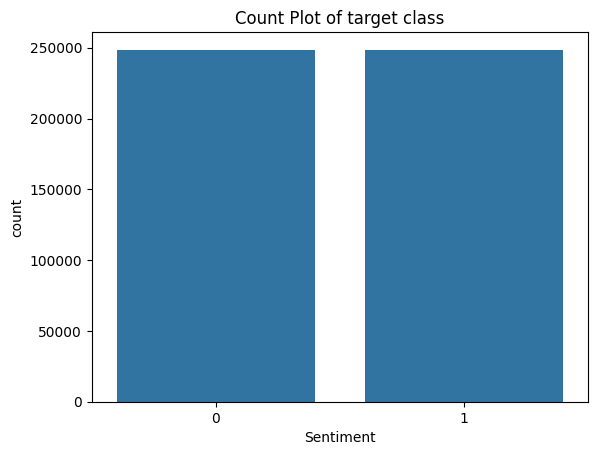

In [ ]:
#countplot count krke bargraph bnata h
sns.countplot(df,x="Sentiment")
plt.title("Count Plot of target class")
plt.show()

In [ ]:
#removing stopwords and punctuation marks
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer=LancasterStemmer()
corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])


497152
Wow slept for almost 12hours. Sleepy me!! Uni now, boo! I wanna stay home, drink tea and watch house... 


In [ ]:
#time
final_corpus=[]
final_corpus_joined=[]
for i in df.index:
  text=re.sub('[^a-zA-Z]',' ',df['text'][i])
  text=text.lower()
  text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
  text=re.sub("(\\d|\\W)+"," ",text)
  text=text.split()
  lem=WordNetLemmatizer()
  text=[lem.lemmatize(word) for word in text if not word in stuff_to_be_removed]
  text1=" ".join(text)
  final_corpus.append(text)
  final_corpus_joined.append(text1)

In [ ]:
data_cleaned = pd.DataFrame()
data_cleaned["text"]= final_corpus_joined
data_cleaned["Sentiment"] = df["Sentiment"].values

In [ ]:
data_cleaned['Sentiment'].value_counts()

0    248576
1    248576
Name: Sentiment, dtype: int64

In [ ]:
data_cleaned.head()

,text,Sentiment
0,wow slept almost hour sleepy uni boo wanna sta...,0
1,get bored idea easily like twitter,0
2,girl sorry homebody lately dont feel well does...,0
3,bk weekend wasnt puppy stay as,0
4,donniewahlberg last night atlanta,0


In [ ]:
data_eda=pd.DataFrame()
data_eda['text']=final_corpus
data_eda['Sentiment']=df["Sentiment"].values
data_eda.head()

,text,Sentiment
0,"[wow, slept, almost, hour, sleepy, uni, boo, w...",0
1,"[get, bored, idea, easily, like, twitter]",0
2,"[girl, sorry, homebody, lately, dont, feel, we...",0
3,"[bk, weekend, wasnt, puppy, stay, as]",0
4,"[donniewahlberg, last, night, atlanta]",0


In [ ]:
#storing positive data separately
positive=data_eda[data_eda['Sentiment']==1]
positive_list=positive['text'].tolist()
#storing negative data separately
negative=data_eda[data_eda['Sentiment']==0]
negative_list=negative['text'].tolist()

In [ ]:
positive_all=" ".join([word for sent in positive_list for word in sent])
negative_all=" ".join([word for sent in negative_list for word in sent])

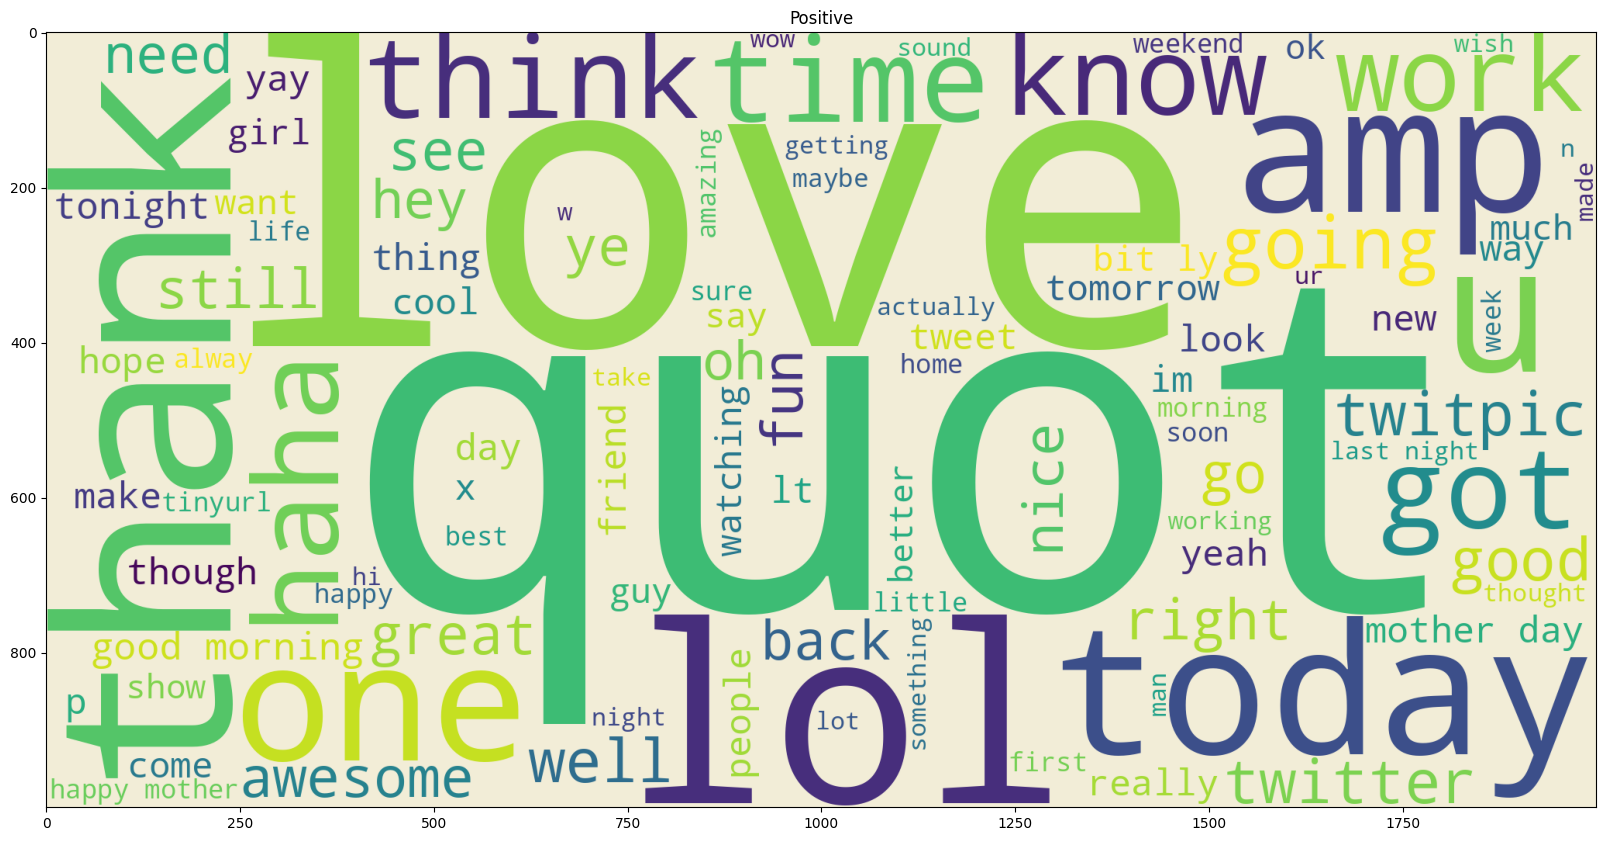

In [ ]:
from wordcloud import WordCloud
WordCloud()
wordcloud=WordCloud(width=2000,height=1000,background_color='#F2EDD7FF',max_words=100).generate(positive_all)
plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

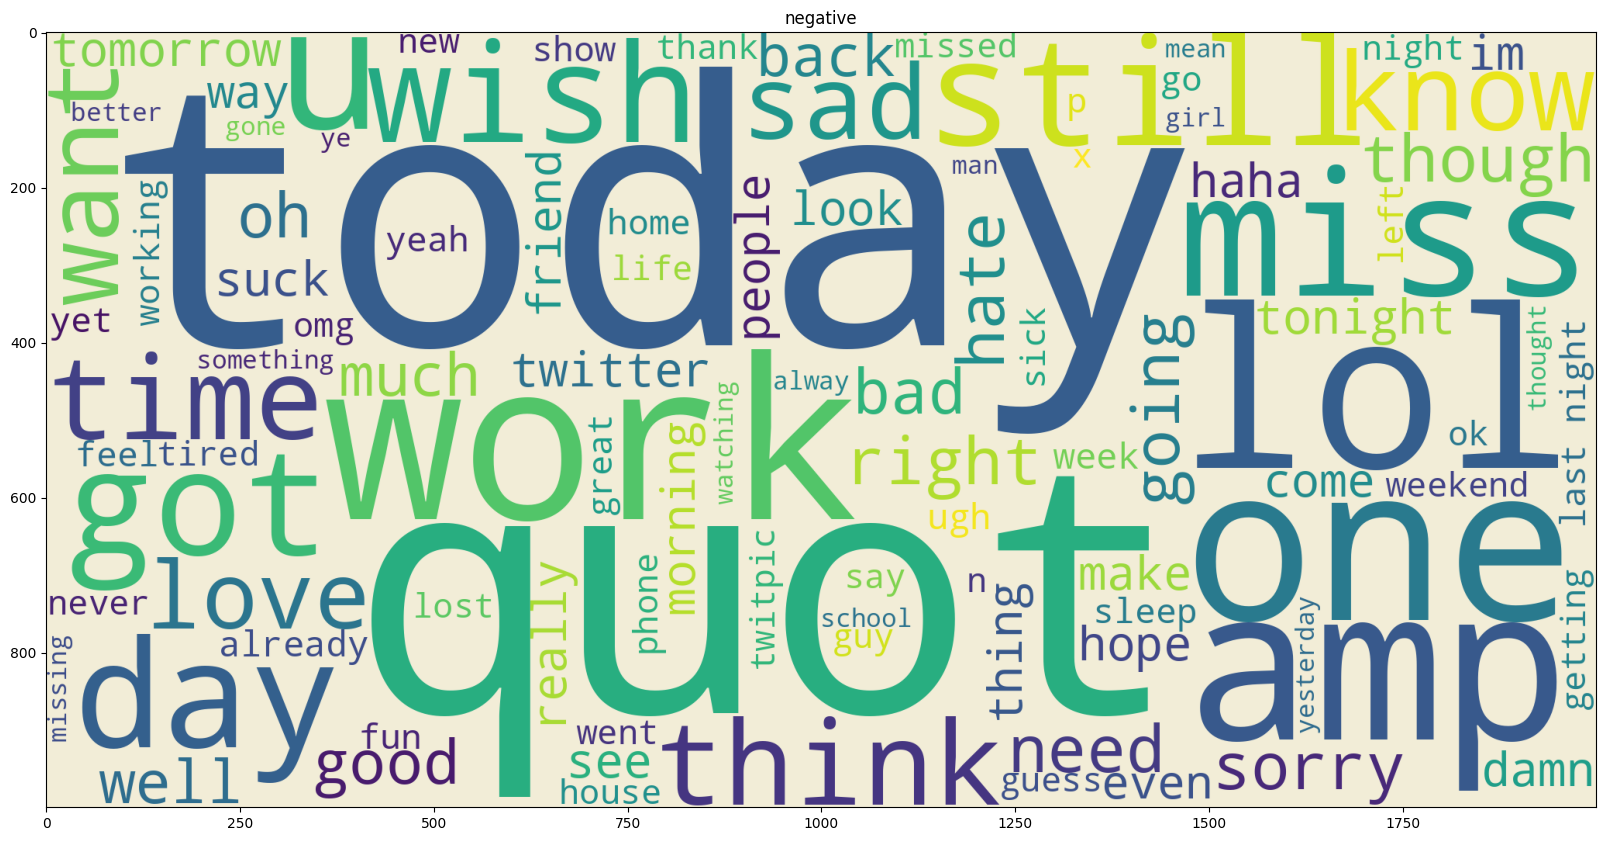

In [ ]:
from wordcloud import WordCloud
WordCloud()
wordcloud=WordCloud(width=2000, height=1000,background_color='#F2EDD7FF',max_words=100).generate(negative_all)
plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

In [ ]:
def get_count(data):
  dic={}
  for i in data:
    for j in i:
      if j not in dic:
        dic[j]=1
      else:
        dic[j]+=1
  return(dic)
count_corpus=get_count(positive_list)

In [ ]:
count_corpus=pd.DataFrame({"word":count_corpus.keys(),"count":count_corpus.values()})
count_corpus=count_corpus.sort_values(by = "count",ascending=False)

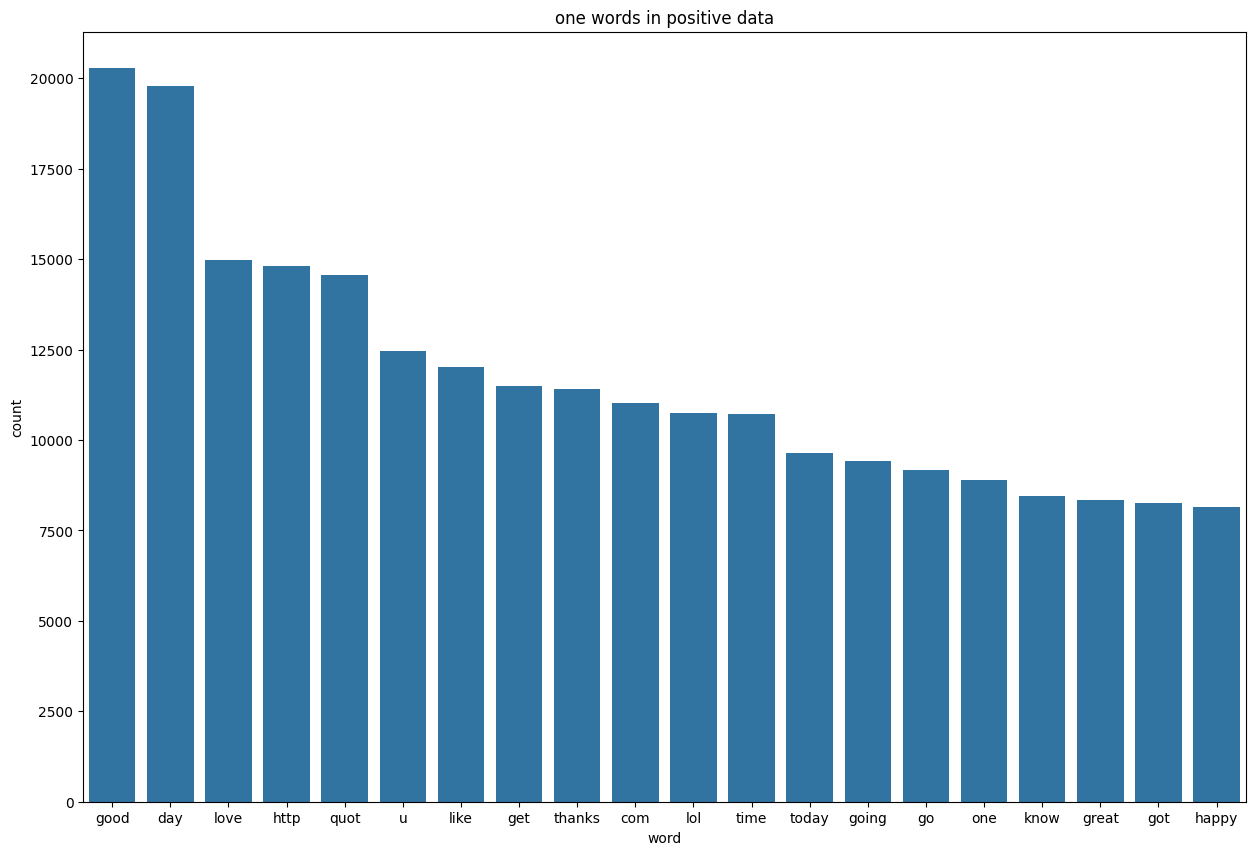

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.barplot(x=count_corpus["word"][:20], y=count_corpus["count"][:20])
plt.title('one words in positive data')
plt.show()

In [ ]:
def get_count(data):
  dic={}
  for i in data:
    for j in i:
      if j not in dic:
        dic[j]=1
      else:
        dic[j]+=1
  return (dic)
count_corpus=get_count(negative_list)

In [ ]:
count_corpus=pd.DataFrame({"word":count_corpus.keys(), "count":count_corpus.values()})
count_corpus=count_corpus.sort_values(by="count",ascending=False)

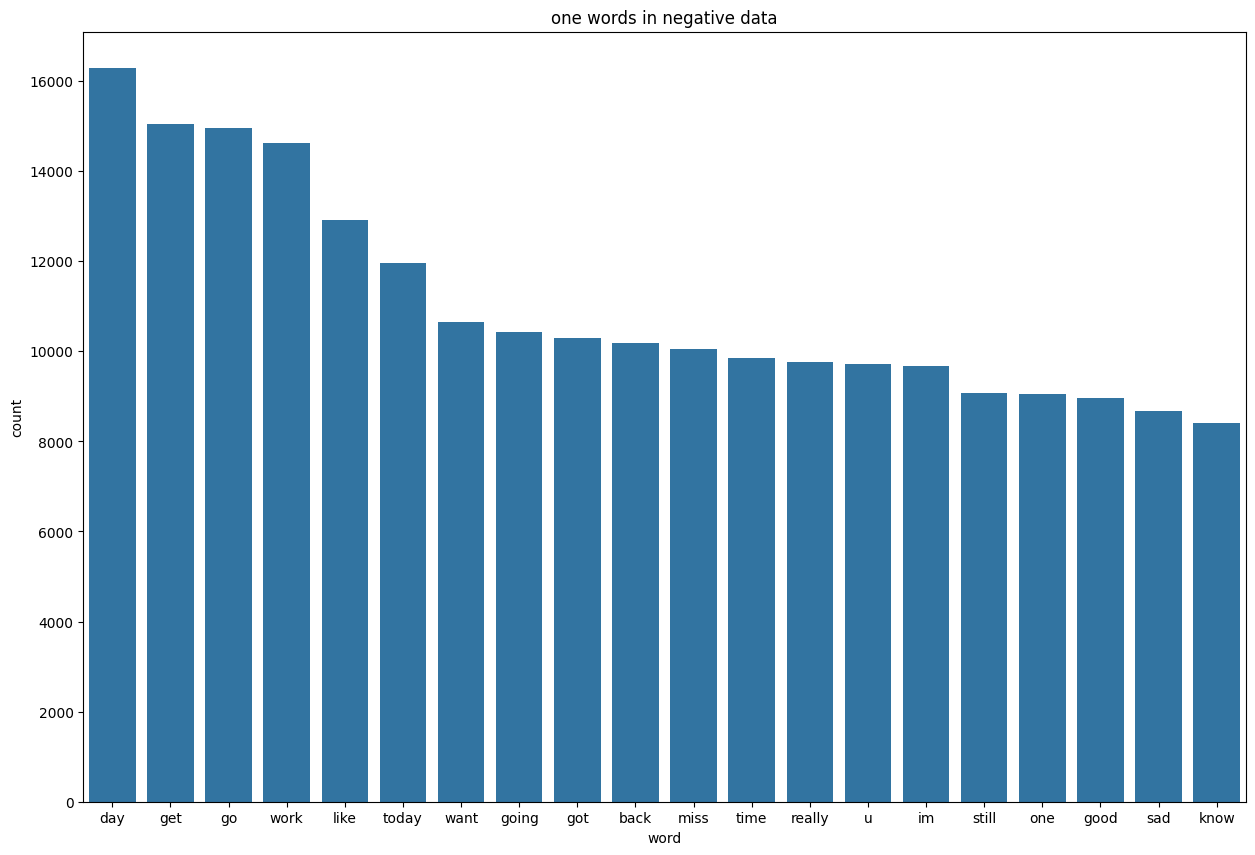

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.barplot(x=count_corpus["word"][:20],y=count_corpus["count"][:20])
plt.title('one words in negative data')
plt.show()

In [ ]:
# NAIVE BAYES FOR SENTIMENT ANALYSIS

In [ ]:
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)
positive_tokens_for_model = get_tweets_for_model(positive_list)
negative_tokens_for_model = get_tweets_for_model(negative_list)

In [ ]:
import random
positive_dataset=[(review_dict,"Positive") for review_dict in positive_tokens_for_model]
negative_dataset=[(review_dict, "Negative") for review_dict in negative_tokens_for_model]
dataset=positive_dataset+negative_dataset
random.shuffle(dataset)
train_data= dataset[:333091]
test_data= dataset[333091:]

 Training Accuracy is: 86.0
Testing Accuracy is: 76.0
Most Informative Features
                 fawcett = True           Negati : Positi =     58.4 : 1.0
                    iran = True           Negati : Positi =     49.8 : 1.0
             squarespace = True           Negati : Positi =     45.3 : 1.0
                  farrah = True           Negati : Positi =     44.2 : 1.0
             heartbroken = True           Negati : Positi =     37.0 : 1.0
                 saddest = True           Negati : Positi =     32.4 : 1.0
                 bruised = True           Negati : Positi =     31.7 : 1.0
                 jackman = True           Positi : Negati =     30.3 : 1.0
                     woe = True           Negati : Positi =     29.7 : 1.0
                hayfever = True           Negati : Positi =     27.7 : 1.0
None
training accuracy  85.0
              precision    recall  f1-score   support

           0       0.83      0.88      0.85    166545
           1       0.87      0.8

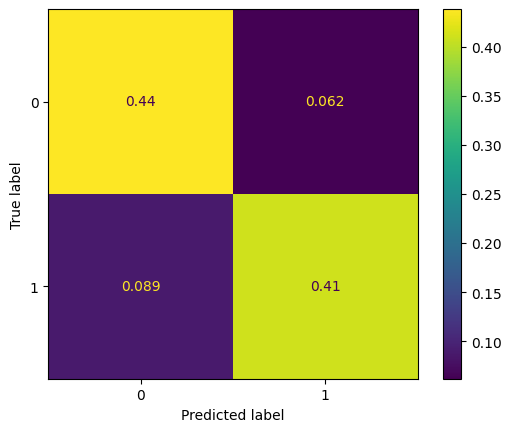

testing accuracy =  76.0
              precision    recall  f1-score   support

           0       0.75      0.80      0.77     82031
           1       0.78      0.73      0.75     82030

    accuracy                           0.76    164061
   macro avg       0.76      0.76      0.76    164061
weighted avg       0.76      0.76      0.76    164061



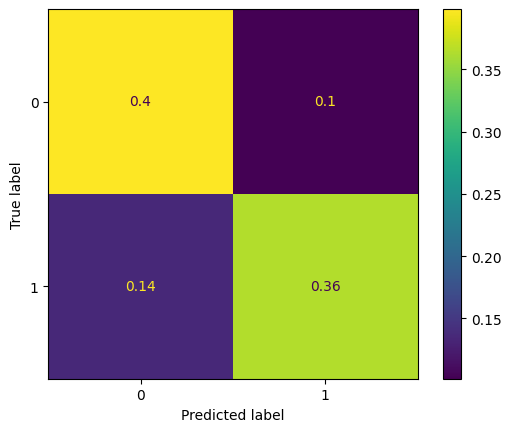

In [ ]:
def metrics(y_train, y_train_pred, y_test, y_test_pred):
  print("training accuracy ",round(accuracy_score(y_train, y_train_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize='all')
  print(classification_report(y_train,y_train_pred))
  plt.show()
  print("testing accuracy = ",round(accuracy_score(y_test,y_test_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,normalize='all')
  print(classification_report(y_test,y_test_pred))
  plt.show()

from nltk import classify
from nltk import NaiveBayesClassifier
classifier= NaiveBayesClassifier.train(train_data)
print(" Training Accuracy is:", round(classify.accuracy(classifier,train_data),2)*100)
print("Testing Accuracy is:", round(classify.accuracy(classifier,test_data),2)*100)

print(classifier.show_most_informative_features(10))
metrics(y_train,y_train_pred,y_test,y_test_pred)




In [ ]:
#TFIDF FOR SENTIMENT ANALYSIS

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
vector=tfidf.fit_transform(data_cleaned['text'])
y=data_cleaned['Sentiment']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
vector=tfidf.fit_transform(data_cleaned['text'])
y=data_cleaned['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector,y,test_size=0.33,random_state=42,stratify=y)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
def metrics(y_train, y_train_pred, y_test, y_test_pred):
  print("training accuracy ",round(accuracy_score(y_train, y_train_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize='all')
  print(classification_report(y_train,y_train_pred))
  plt.show()
  print("testing accuracy = ",round(accuracy_score(y_test,y_test_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,normalize='all')
  print(classification_report(y_test,y_test_pred))
  plt.show()

In [ ]:
#MULTINOMIAL NB

training accuracy  85.0
              precision    recall  f1-score   support

           0       0.83      0.88      0.85    166545
           1       0.87      0.82      0.85    166546

    accuracy                           0.85    333091
   macro avg       0.85      0.85      0.85    333091
weighted avg       0.85      0.85      0.85    333091



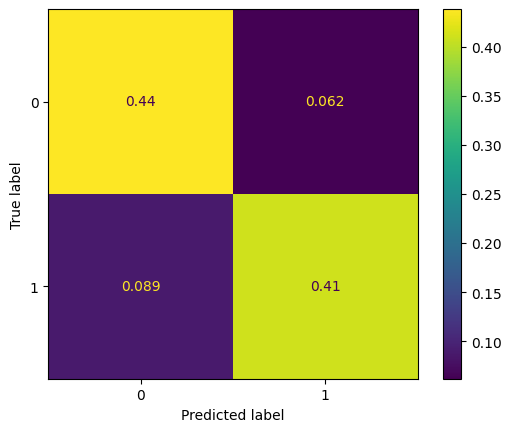

testing accuracy =  76.0
              precision    recall  f1-score   support

           0       0.75      0.80      0.77     82031
           1       0.78      0.73      0.75     82030

    accuracy                           0.76    164061
   macro avg       0.76      0.76      0.76    164061
weighted avg       0.76      0.76      0.76    164061



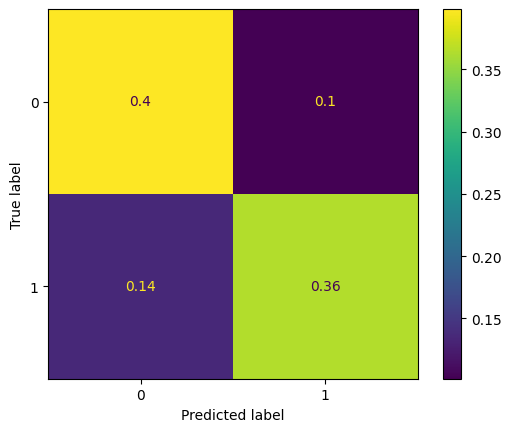

In [ ]:
NB = MultinomialNB()
NB.fit(X_train,y_train)
y_train_pred = NB.predict(X_train)
y_test_pred = NB.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)


In [ ]:
#LINEAR SVC

training accuracy  90.0
              precision    recall  f1-score   support

           0       0.90      0.90      0.90    166545
           1       0.90      0.90      0.90    166546

    accuracy                           0.90    333091
   macro avg       0.90      0.90      0.90    333091
weighted avg       0.90      0.90      0.90    333091



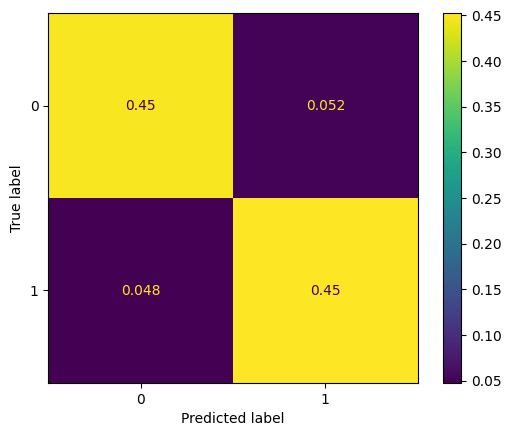

testing accuracy =  77.0
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     82031
           1       0.76      0.78      0.77     82030

    accuracy                           0.77    164061
   macro avg       0.77      0.77      0.77    164061
weighted avg       0.77      0.77      0.77    164061



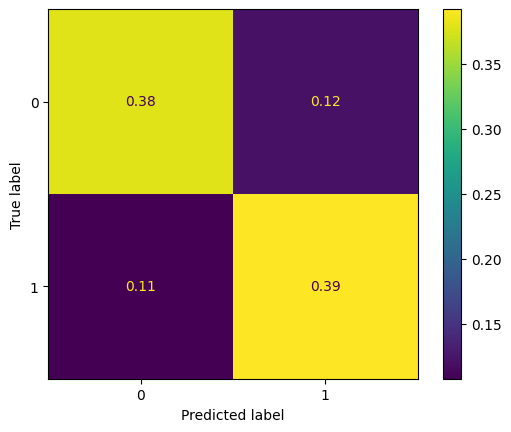

In [ ]:
svc = LinearSVC()
svc.fit(X_train,y_train)
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

In [ ]:
#LOGISTIC REGRESSION

training accuracy  83.0
              precision    recall  f1-score   support

           0       0.84      0.81      0.82    166545
           1       0.82      0.84      0.83    166546

    accuracy                           0.83    333091
   macro avg       0.83      0.83      0.83    333091
weighted avg       0.83      0.83      0.83    333091



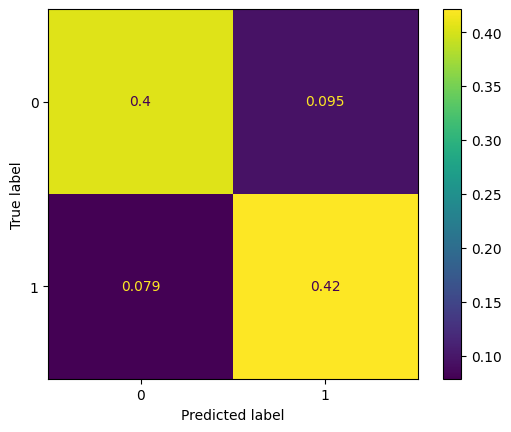

testing accuracy =  78.0
              precision    recall  f1-score   support

           0       0.79      0.75      0.77     82031
           1       0.77      0.80      0.78     82030

    accuracy                           0.78    164061
   macro avg       0.78      0.78      0.78    164061
weighted avg       0.78      0.78      0.78    164061



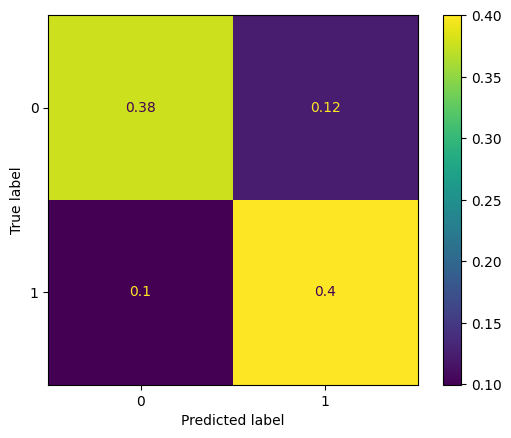

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

In [ ]:
-9//7

-2